# 第一课-第四周编程作业-一步步搭建多层神经网络以及应用(1&2)

## 任务描述
本次作业，需要构建两个神经网络，一个是构建两层的神经网络，一个是构建多层的神经网络，多层神经网络层数可以自己定义。

**`[LINEAR-> ACTIVATION]` 函数:**

一个多层的神经网络，结构是输入层->隐藏层->隐藏层->···->隐藏层->输出层，在每一层中:
* 先计算`Z = np.dot(W,A) + b`，这叫做**【linear_forward】**
* 再计算`A = relu(Z)` 或者 `A = sigmoid(Z)` ,这叫做**【linear_activation_forward】**
---
**一个神经网络的计算过程如下:：**
1. 初始化参数
2. 前向传播

    2.1 计算一层的中线性求和的部分
    
    2.2 计算激活函数的部分（ReLU使用L-1次，Sigmod使用1次）
    
    2.3 结合线性求和与激活函数
3. 计算误差
4. 反向传播

    4.1 线性部分的反向传播公式

    4.2 激活函数部分的反向传播公式

    4.3 结合线性部分与激活函数的反向传播公式
5. 更新参数

**整个流程图如下图表所示：**
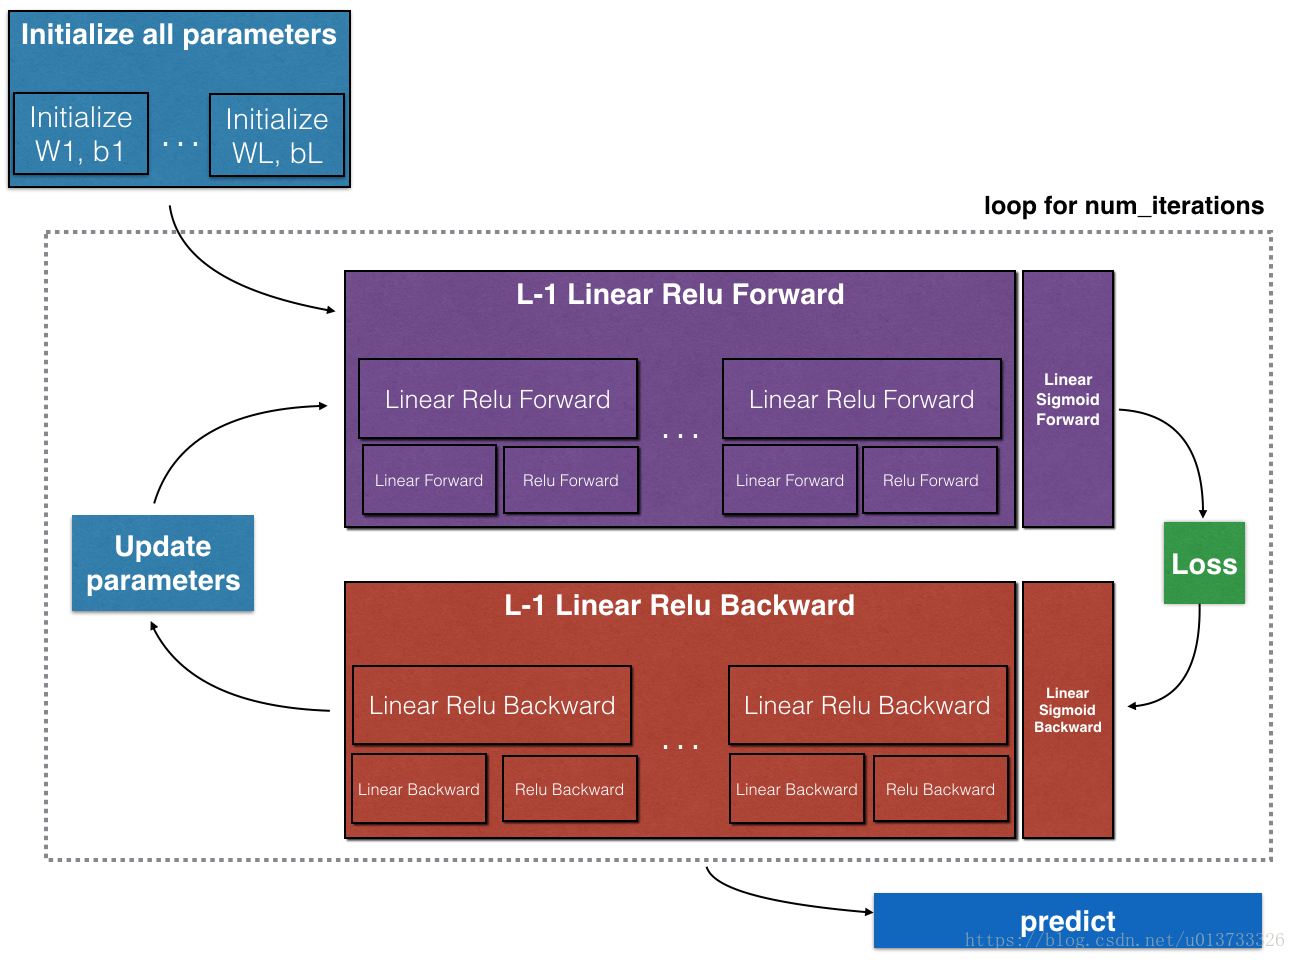

---
接下来开始分别构建两层神经网络和多层神经网络
## 0. 准备软件包

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import testCases #参见资料包
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward #参见资料包
import lr_utils #参见资料包

np.random.seed(1) # 指定随机种子

## 1. 初始化参数

对于两层的神经网络结构，模型结构是线性->ReLU->线性->sigmoid函数

In [4]:
def initialize_parameters(n_x, n_h, n_y):
    """
    此函数初始化两层神经网络的参数
    参数：
        n_x - 输入层节点数量
        n_h - 隐藏层节点数量
        n_y - 输出层节点数量
    返回：
        parameters - 包含参数的python字典：
            W1 - 权重矩阵 (n_h, n_x)
            b1 - 偏向量   (n_h, 1)
            W2 - 权重矩阵 (n_y, n_h)
            b1 - 偏向量   (n_y, 1)
    """
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    # 使用断言确保数据格式正确
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2 }
    
    return parameters

# 测试initialize_parameters
print("==============测试initialize_parameters==============")
parameters = initialize_parameters(3, 2, 1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

==============测试initialize_parameters==============
W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


对于多层（L层）的神经网络，假设X（输入数据）的维度为(1228, 209)
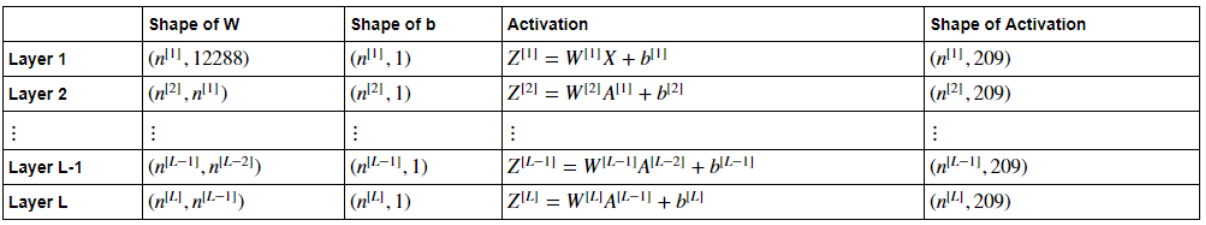
* 第l层的W的维度为`(layer_dims[l], layer_dims[l - 1])`
* 第l层的b的维度为`(layer_dims[l], 1)`

In [8]:
def initialize_parameters_deep(layers_dims):
    """
    此函数初始化多层神经网络的参数
    参数：
        layers_dims - 包含神经网络中每层的节点数量的列表
    返回：
        parameters - 包含参数"W1`","b1", ... ,"WL","bL"的字典：
            W1 - 权重矩阵 (layers_dims[1], layers_dims[0])
            b1 - 偏向量   (layers_dims[1], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) / np.sqrt(layers_dims[l - 1])
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))
        
        assert(parameters["W" + str(l)] == (layers_dims[l], layers_dims[l - 1]))
        assert(parameters["b" + str(l)] == (layers_dims[l], 1))
    
    return parameters